In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/promotion-prediction-dataset/clustered_dataset.csv


# EDA Analysis

In [2]:
path = '/kaggle/input/promotion-prediction-dataset/clustered_dataset.csv'
data = pd.read_csv(path)
data.head(2)

,date_of_birth,date_of_joining,gender,delivered projects,behaviour,punctual,age,years_of_service,promotion_label
0,26/07/1983,09/11/2021,1,8,3,0,42,4,1
1,24/01/1989,06/01/2015,0,20,2,1,36,10,0


* **Checking Null Values**

In [3]:
data.isnull().sum()

date_of_birth         0
date_of_joining       0
gender                0
delivered projects    0
behaviour             0
punctual              0
age                   0
years_of_service      0
promotion_label       0
dtype: int64

* **Shape**

In [4]:
print(f"Totla Number of Columns: {data.shape[1]}")
print(f"Totla Number of rows: {data.shape[0]}")

Totla Number of Columns: 9
Totla Number of rows: 300


* **Summary**

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_of_birth       300 non-null    object
 1   date_of_joining     300 non-null    object
 2   gender              300 non-null    int64 
 3   delivered projects  300 non-null    int64 
 4   behaviour           300 non-null    int64 
 5   punctual            300 non-null    int64 
 6   age                 300 non-null    int64 
 7   years_of_service    300 non-null    int64 
 8   promotion_label     300 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 21.2+ KB
None


* **General Stats**

In [6]:
data.describe

<bound method NDFrame.describe of     date_of_birth date_of_joining  gender  delivered projects  behaviour  \
0      26/07/1983      09/11/2021       1                   8          3   
1      24/01/1989      06/01/2015       0                  20          2   
2      22/10/1967      19/01/2019       1                  12          0   
3      23/03/1990      18/05/2017       1                  16          2   
4      28/02/1980      07/08/2008       0                  34          1   
..            ...             ...     ...                 ...        ...   
295    17/12/1974      28/08/2011       1                  28          1   
296    30/10/1987      21/02/2021       1                   8          3   
297    13/08/1977      14/12/2019       0                  12          0   
298    11/01/1996      21/03/2021       0                   8          3   
299    12/11/1965      24/11/2016       1                  18          1   

     punctual  age  years_of_service  promotion_label

* **Converting Date Columns**

In [7]:
date_cols = ['date_of_birth', 'date_of_joining']

# Step 1: Convert all date columns with dayfirst=True to avoid warning
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce', dayfirst=True)

# Step 2: Create numeric features
data['age_years'] = (pd.to_datetime('today') - data['date_of_birth']).dt.days // 365
data['service_days'] = (pd.to_datetime('today') - data['date_of_joining']).dt.days

# Step 3: Drop original date columns
data.drop(columns=date_cols, inplace=True)

# Step 4: Recompute column types
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Final Confirmation
print(" Cleaned Numeric Columns:", numeric_cols)
print(" Remaining Categorical Columns:", categorical_cols)


 Cleaned Numeric Columns: ['gender', 'delivered projects', 'behaviour', 'punctual', 'age', 'years_of_service', 'promotion_label', 'age_years', 'service_days']
 Remaining Categorical Columns: []


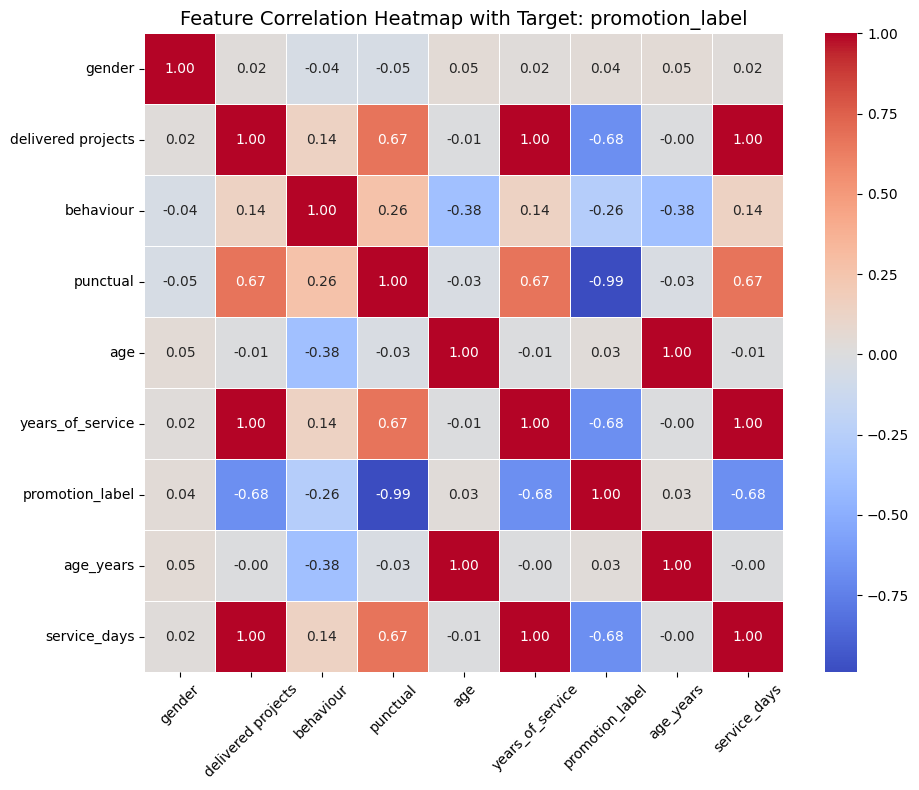

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute correlation matrix
correlation_matrix = data.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap with Target: promotion_label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Features Importance using  RandomForestClassifier

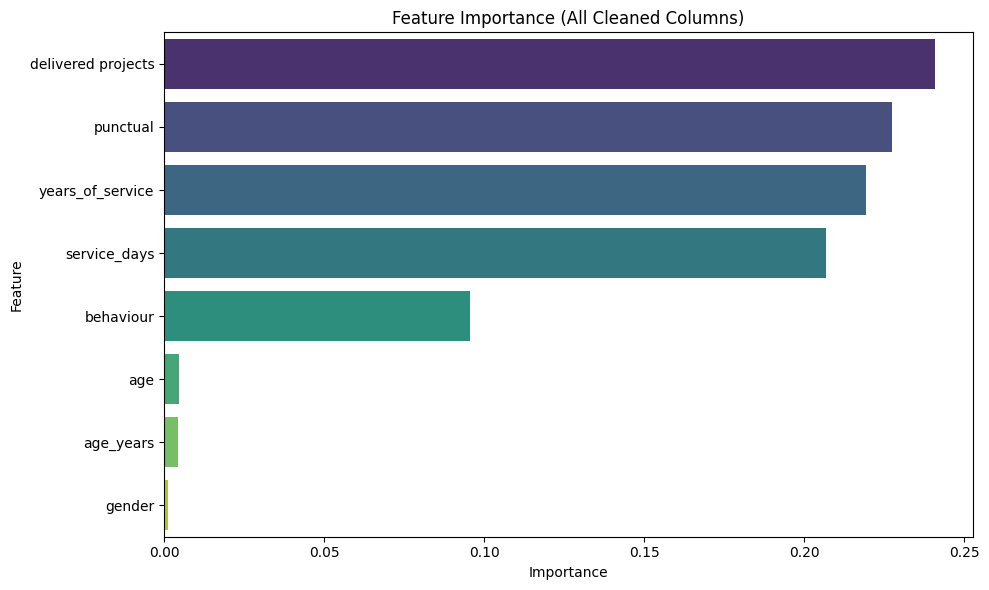

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Final cleaned numeric columns
features = [
    'gender', 'delivered projects', 'behaviour', 'punctual',
    'age', 'years_of_service', 'age_years', 'service_days'
]

X = data[features]
y = data['promotion_label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance (All Cleaned Columns)')
plt.tight_layout()
plt.show()


# Drop unnecassary Columns 

In [10]:
# Drop columns
data = data.drop(['gender', 'age'], axis=1)

# Check new columns
print("Remaining columns after drop:\n", data.columns)


Remaining columns after drop:
 Index(['delivered projects', 'behaviour', 'punctual', 'years_of_service',
       'promotion_label', 'age_years', 'service_days'],
      dtype='object')


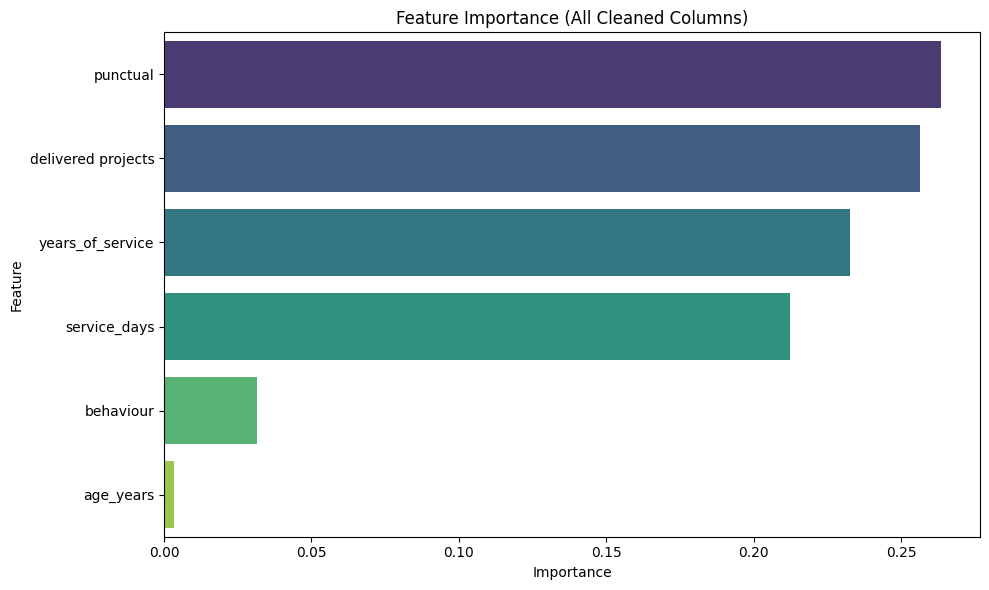

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Final cleaned numeric columns
features = [ 'delivered projects', 'behaviour', 'punctual', 'years_of_service', 'age_years', 'service_days'
]

X = data[features]
y = data['promotion_label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance (All Cleaned Columns)')
plt.tight_layout()
plt.show()


# Modeling

*   **Train-Test Split**

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('promotion_label', axis=1)
y = data['promotion_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*  **Model Fit Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



* **Checking if Model is Overfitting**

In [14]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Accuracy (LogReg):", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))


Accuracy (LogReg): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Saving

In [15]:
import joblib

# Save Random Forest model
joblib.dump(model, 'random_forest_model.pkl')

# Save Logistic Regression model
joblib.dump(log_model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [16]:
import os

print(os.listdir())


['__notebook__.ipynb', 'logistic_regression_model.pkl', 'random_forest_model.pkl']
